In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_widths
from scipy.optimize import fsolve
from scipy import interpolate
from tkinter import filedialog

import sys
sys.path.append("N:/Photonische_Thermometrie/52_Programmierung/Python_lib_PTL_V01")

from Photonic_Data_Analysis_V1 import *
from Photonic_fit_funtction_lib_V2021_10 import *
from Photonic_Gascell_calibration_lib_V2024_02 import *
from Photonic_instruments_lib_V2023_07 import *
# %matplotlib ipympl

load_default_plot_font(fontsize = 20)



In [2]:
files = filedialog.askopenfilename(multiple=True)
files = np.sort(files)


In [3]:
# Read txt files as dataframe
def read_txt(file):
    # Wavelength (nm)   Power (mW)	Detector 1	Detector 2	
    data_df = pd.read_csv(file, sep= '\t', header=0, usecols=["Wavelength (nm)", "Detector 1", "Gas Cell"])
    return data_df

In [4]:
dfs = []
pos = []
dataset = []

# Use read_txt function to read all files
for file in files:
    if 'txt' in file:
        if "0C" in file:
            data_df = read_txt(file)
            ref_df = data_df
        else:
            data_df = read_txt(file)
            # data_df.sort_values(by = 'Wavelength (nm)', inplace = True)
            reversed_df = data_df.iloc[::-1].reset_index(drop=True)
            # data_df["Wavelength (nm)"] = data_df["Wavelength (nm)"].iloc[::-1].reset_index(drop=True)
            dfs.append(reversed_df)
            pos_name = file.split("_P")[1].split("_")[0]
            pos.append(int(pos_name))


In [5]:
prev_shift = 0
peak_positions = []
df_HCN = HCN_gascell_peaks()
plot = False
output = False
for df in dfs:
    df['Gas Cell'] = baseline_cor_2steps(df['Gas Cell'])
    peaks_gascell, properties_gascell, branches = Gascell_peaks_check(df['Gas Cell'], df_HCN, HCN=True, plot=False)
    peaks_Voigt_Pos,peak_Voigt_Amp = peak_fitting_Voigt_1center(df['Gas Cell'], peaks_gascell, properties_gascell, fit_range_faktor=0.5,plot=False)
    peaks_Voigt_Wav = df['Wavelength (nm)'].iloc[peaks_Voigt_Pos]
    
    df_HCN_gascell_needed = df_HCN["wavelength/nm"].iloc[26-branches[0]:branches[0]+branches[1]+1]
    residuals = (peaks_Voigt_Wav.values-df_HCN_gascell_needed.values)
    
    if plot == True: 
        fig, ax = plt.subplots(2, 1,sharex=True,figsize=(15,11)) 
        ax[0].plot(df['Wavelength (nm)'],df['Gas Cell'],label='Gascell transmission')
        ax[0].plot(peaks_Voigt_Wav,peak_Voigt_Amp,'ro',label='Gascell peaks detected')
        ax[0].plot(df_HCN_gascell_needed,peak_Voigt_Amp,'*g',label='SRM reference positions')
        ax[1].plot(df_HCN_gascell_needed,residuals*1000,'ro',label='Residuals to SRM / pm')
        plt.legend()
    
    if output == True:
        print ('Residual mean: ', np.mean(residuals))

    xdata       = df_HCN_gascell_needed
    ydata       = residuals
    
    popt_WL, pcov_WL                 = curve_fit(WL_fit_3order, xdata=xdata,ydata=ydata)
    y_WL                             = WL_fit_3order(xdata, *popt_WL)
    residuals_fit = ((ydata-y_WL)*1000)
    
    if plot == True: 
        fig, ax = plt.subplots(2, 1,sharex=True,figsize=(15,15)) 
        ax[0].plot(xdata,ydata *1000,'ro',label=('data Voigt '+'\nSTD: ') + str(np.round(ydata.std()*1000,2))+'pm\nOffset:'+str(np.round(np.median(y_WL)*1000,1))+'pm')
        ax[0].plot(xdata,y_WL*1000,':',label='3rd order fit')
        ax[1].plot(xdata,(ydata-y_WL)*1000,'x',label=('3rd order fit residuals'+'\nSTD:  ') + str(np.round(residuals_fit.std(),2))+'pm')

    if output == True:
        print ('std: ' , residuals_fit.std(),'\nmin: ' ,residuals_fit.min(),'\nmax: ' ,residuals_fit.max())
    if plot == True: 
        ax[0].set_xlabel('wavelength /nm')
        ax[1].set_xlabel('wavelength /nm')
            
        ax[0].set_ylabel('x offset to SRM value / pm')
        ax[1].set_ylabel('wavelength residuals fit / pm')
        ax[0].legend()
        ax[1].legend()
        # plt.close()
    # df_wavelength = pd.DataFrame({'Wavelength (nm)': df['Wavelength (nm)'] - WL_fit_3order(df['Wavelength (nm)'], *popt_WL)})
    df['Corrected /nm'] = (df['Wavelength (nm)'] - WL_fit_3order(df['Wavelength (nm)'], *popt_WL))



Peaks detected: 54
Peaks R-Branch: 28  | P-Branch: 26
R branch peak to much: 1
P branch peak missing:  1
WL cal. range:  1527.63342 nm - 1564.44519 nm
Peaks detected: 54
Peaks R-Branch: 28  | P-Branch: 26
R branch peak to much: 1
P branch peak missing:  1
WL cal. range:  1527.63342 nm - 1564.44519 nm
Peaks detected: 54
Peaks R-Branch: 28  | P-Branch: 26
R branch peak to much: 1
P branch peak missing:  1
WL cal. range:  1527.63342 nm - 1564.44519 nm
Peaks detected: 54
Peaks R-Branch: 28  | P-Branch: 26
R branch peak to much: 1
P branch peak missing:  1
WL cal. range:  1527.63342 nm - 1564.44519 nm
Peaks detected: 54
Peaks R-Branch: 28  | P-Branch: 26
R branch peak to much: 1
P branch peak missing:  1
WL cal. range:  1527.63342 nm - 1564.44519 nm
Peaks detected: 54
Peaks R-Branch: 28  | P-Branch: 26
R branch peak to much: 1
P branch peak missing:  1
WL cal. range:  1527.63342 nm - 1564.44519 nm
Peaks detected: 54
Peaks R-Branch: 28  | P-Branch: 26
R branch peak to much: 1
P branch peak m

/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


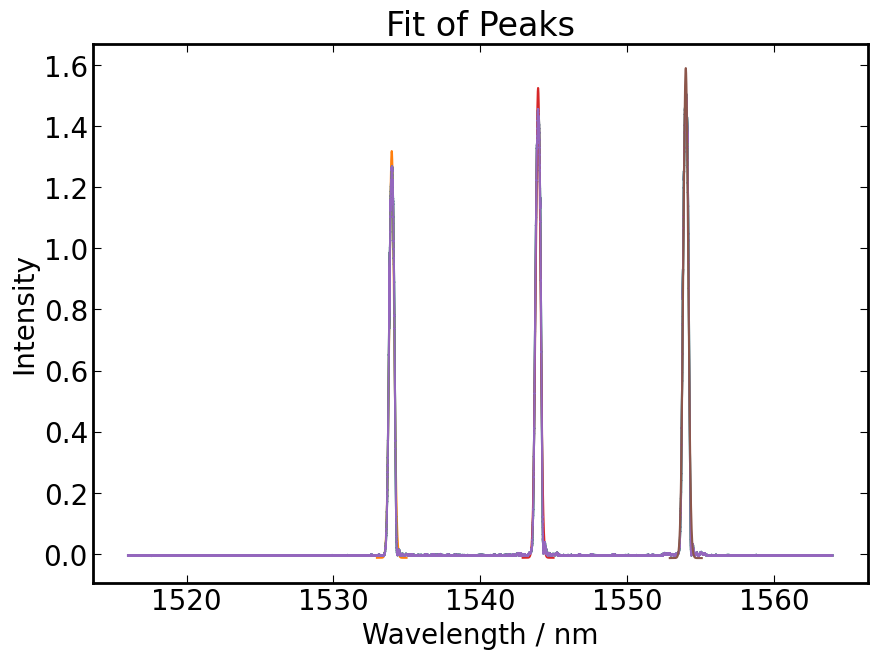

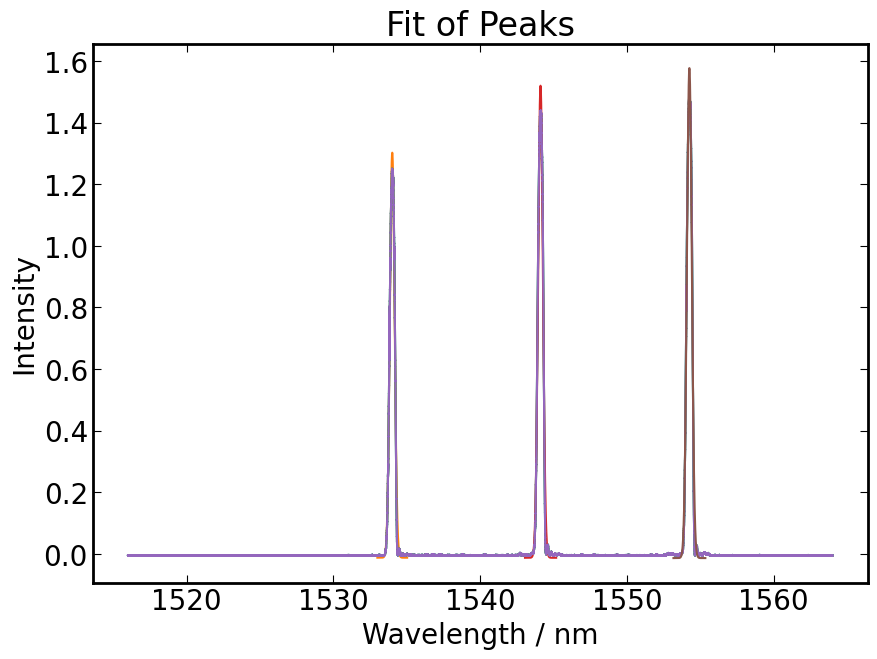

(1554.2479332438902, 1544.10660993731, 1534.0056761215906)

In [6]:
plt.figure(figsize=(10,7))
calculate_peaks(np.asarray(dfs[0].loc[:, "Corrected /nm"]), np.asarray(dfs[0].loc[:, "Detector 1"]), expected_peaks = 3, fit_type = voigtlin_same_cen_const, plot = True)
plt.figure(figsize=(10,7))
calculate_peaks(np.asarray(dfs[1].loc[:, "Corrected /nm"]), np.asarray(dfs[1].loc[:, "Detector 1"]), expected_peaks = 3, fit_type = voigtlin_same_cen_const, plot = True)


In [7]:
peaks0 = []
peaks1 = []
peaks2 = []
# Separately append the peaks of each FBG
i = 0
for df in dfs:
    p0, p1, p2 = calculate_peaks(np.asarray(df.loc[:, "Corrected /nm"]), np.asarray(df.loc[:, "Detector 1"]), expected_peaks = 3, fit_type = voigtlin_same_cen_const, plot = False)
    peaks0.append(p0)
    peaks1.append(p1)
    peaks2.append(p2)



No Fit
No Fit
No Fit
No Fit
No Fit
No Fit


In [117]:
ref_peaks = calculate_peaks(np.asarray(ref_df.loc[:, "Wavelength (nm)"]), np.asarray(ref_df.loc[:, "Detector 1"])) 
rev_ref_peaks = [ref_peaks[-1], ref_peaks[1], ref_peaks[0]]
ref_peaks  = rev_ref_peaks

pos0_val = []
peaks0_val = []
# Use smaller range of peaks for FBG1
for i in range(0, len(peaks0)):
    if peaks0[i] != 0:
        pos0_val.append(pos[i])
        peaks0_val.append(peaks0[i])
peaks0 = peaks0_val

pos0 = [val-20 for val in pos0_val]
pos1 = [val-30 for val in pos]
pos2 = [val-40 for val in pos]


peaks0_shift = peaks0-peaks0[0]
peaks1_shift = peaks1-peaks1[0]
peaks2_shift = peaks2-peaks2[0]


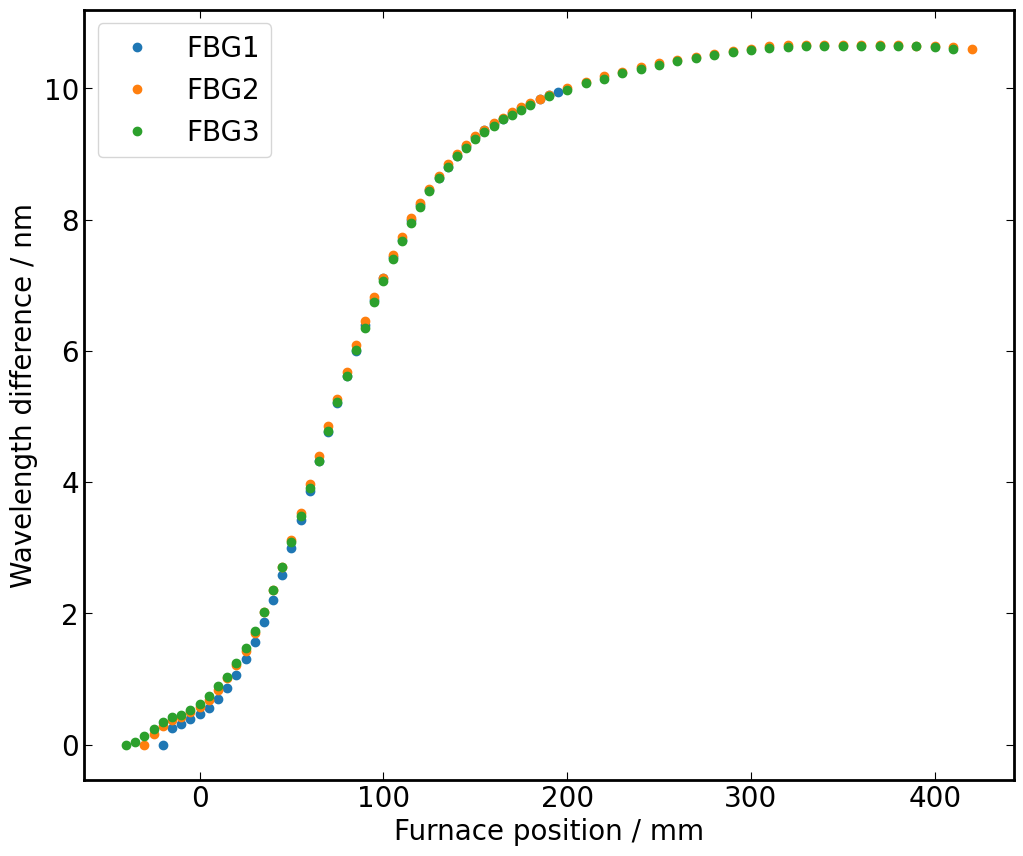

In [118]:

plt.figure(figsize=(12,10))
plt.plot(pos0, peaks0_shift, 'o', label = 'FBG1')
plt.plot(pos1, peaks1_shift, 'o', label = 'FBG2')
plt.plot(pos2, peaks2_shift, 'o', label = 'FBG3')
# plt.plot(pos0, peaks0_shift, label = 'FBG1')
# plt.plot(pos1, peaks1_shift, label = 'FBG2')
# plt.plot(pos2, peaks2_shift, label = 'FBG3')
plt.ylabel('Wavelength difference / nm')
plt.xlabel('Furnace position / mm')
plt.legend(loc='best')
plt.show()

In [119]:
print(ref_peaks)

[1553.532937, 1543.561904, 1533.630155]


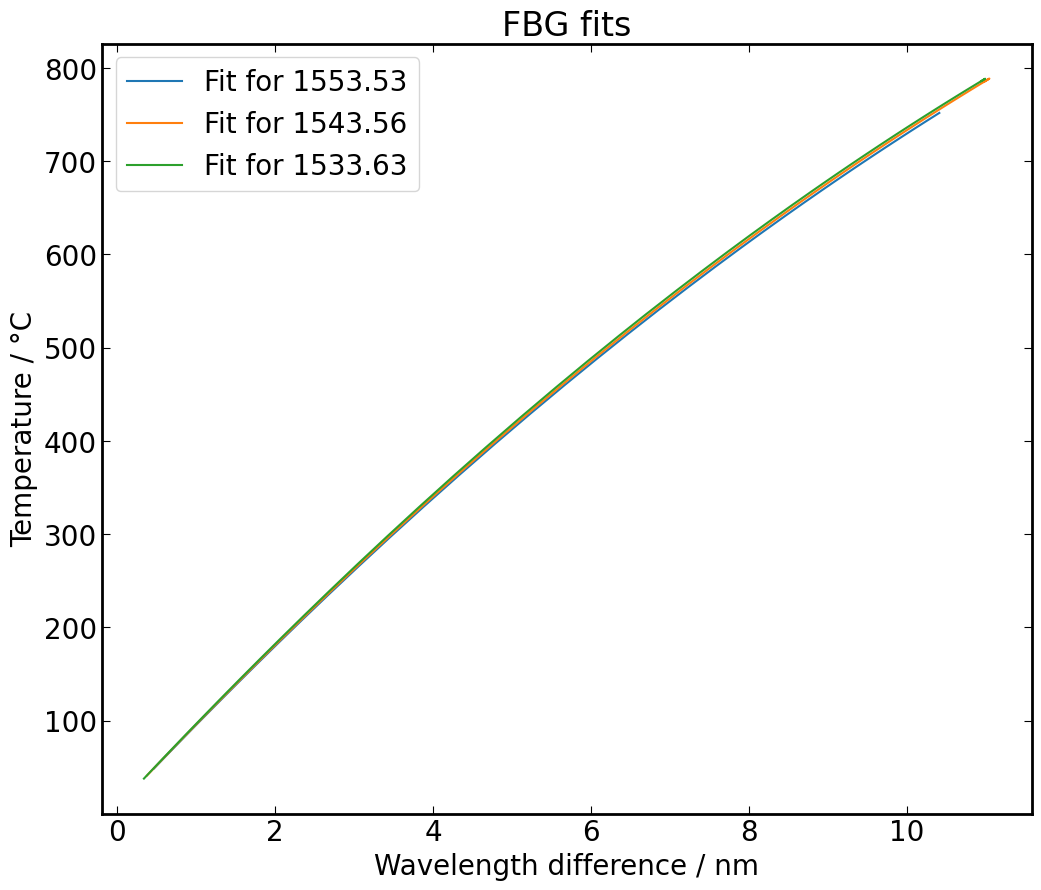

[1553.532937, 1543.561904, 1533.630155]


In [120]:
# Calculate Temperature Values
plt.figure(figsize=(12,10))
parms0 = [7.26378985, 89.88553396, -1.76343146]
parms1 = [7.29485246, 90.4193956, -1.78066693]
parms2 = [7.16257355, 91.22856307, -1.83185557]
t0 = wavelength_to_temperature(np.array(peaks0), parms0, ref_peaks[0], polynomial_deg = 2, plot = True)
t1 = wavelength_to_temperature(np.array(peaks1), parms1, ref_peaks[1], polynomial_deg = 2, plot = True)
t2 = wavelength_to_temperature(np.array(peaks2), parms2, ref_peaks[2], polynomial_deg = 2, plot = True)
plt.show()
print(ref_peaks)

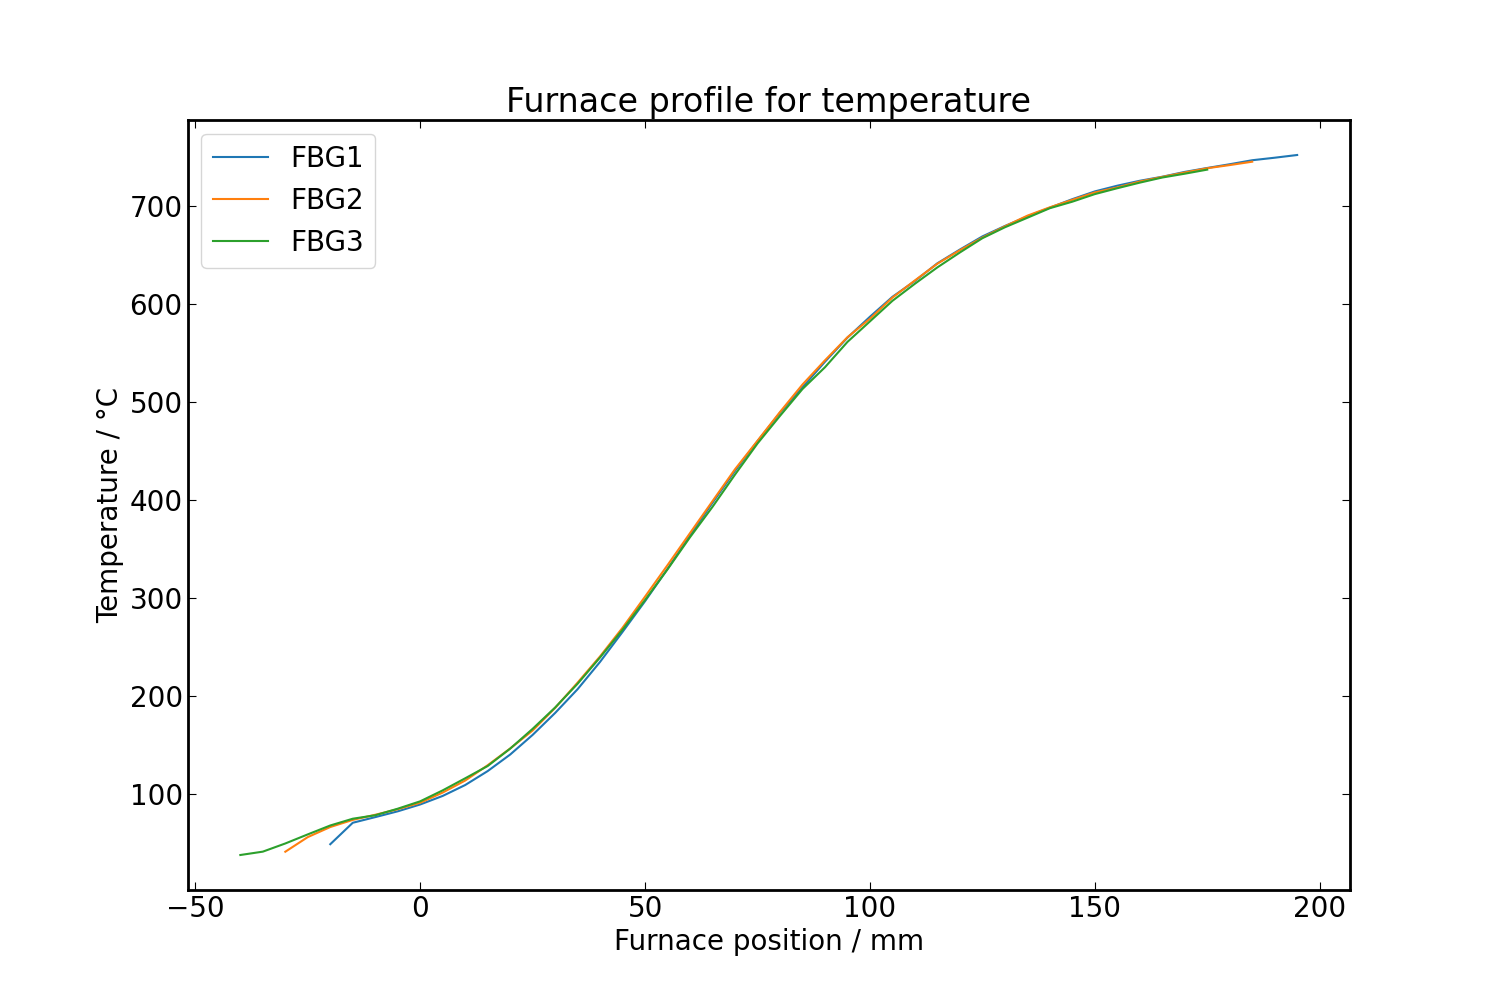

In [140]:
# Show adjusted plots
# plt.figure(figsize=(12,10))
# plt.plot(pos0, peaks0_shift, 'o', label = 'FBG1')
# plt.plot(pos1, peaks1_shift, 'o', label = 'FBG2')
# plt.plot(pos2, peaks2_shift, 'o', label = 'FBG3')
# plt.title('Furnace profile for wavelength shift')
# plt.ylabel('Wavelength difference / nm')
# plt.xlabel('Furnace position / mm')
# plt.legend(loc='best')
# plt.show()

# Show adjusted plots

%matplotlib ipympl
plt.figure(figsize=(15,10))
plt.plot(pos0, t0, label = 'FBG1')
plt.plot(pos1[0:len(pos0)], t1[0:len(pos0)], label = 'FBG2')
plt.plot(pos2[0:len(pos0)], t2[0:len(pos0)], label = 'FBG3')
plt.title('Furnace profile for temperature')
plt.ylabel('Temperature / °C')
plt.xlabel('Furnace position / mm')
plt.legend(loc='best')
plt.show()

In [122]:
# Temperature to wavelength calculation for each grating using pm/K result
def t_to_wavelength(peak0, peaks, t_pos, t_fbg):
    wavelength = peak0 + t_pos*(np.max(peaks)-peak0)/np.max(t_fbg)
    return wavelength

# Searching closest measured wavelength to find position of temperature
def position_of_t(pos, peak0, peaks, t_pos, t_fbg):
    wavelength = t_to_wavelength(peak0, peaks, t_pos, t_fbg)
    calc_wave = 0
    calc_pos = 0
    for i in range(0, len(peaks)):
        if abs(calc_wave-wavelength) > abs(peaks[i]-wavelength):
            calc_wave = peaks[i]
            calc_pos = pos[i]
    return calc_wave, calc_pos

# Output of wavelengths for temperatures
def position_FBGs_t(pos, peak0, peaks, t_pos, FBG, t_fbg):
    if FBG == 1:
        print(f'Calculation for {t_pos}°C')
    if any(t_val  >= t_pos for t_val in t_fbg):
        calc_wave, calc_pos = position_of_t(pos, peak0, peaks, t_pos, t_fbg)
        print(f'FBG{FBG}: Wavelength = {calc_wave:.4f} nm at Position = {calc_pos} mm')
    if FBG == 3:
        print('\n')

temp = [500, 600, 700, 800]
for t in temp:
    position_FBGs_t(pos0, ref_peaks[0], peaks0, t, 1, t0)
    position_FBGs_t(pos1, ref_peaks[1], peaks1, t, 2, t1)
    position_FBGs_t(pos2, ref_peaks[2], peaks2, t, 3, t2)



Calculation for 500°C
FBG1: Wavelength = 1560.3934 nm at Position = 90 mm
FBG2: Wavelength = 1550.4004 nm at Position = 90 mm
FBG3: Wavelength = 1540.7088 nm at Position = 95 mm


Calculation for 600°C
FBG1: Wavelength = 1561.6931 nm at Position = 110 mm
FBG2: Wavelength = 1551.9583 nm at Position = 115 mm
FBG3: Wavelength = 1541.9144 nm at Position = 115 mm


Calculation for 700°C
FBG1: Wavelength = 1563.2586 nm at Position = 150 mm
FBG2: Wavelength = 1553.4053 nm at Position = 160 mm
FBG3: Wavelength = 1543.4005 nm at Position = 160 mm


Calculation for 800°C




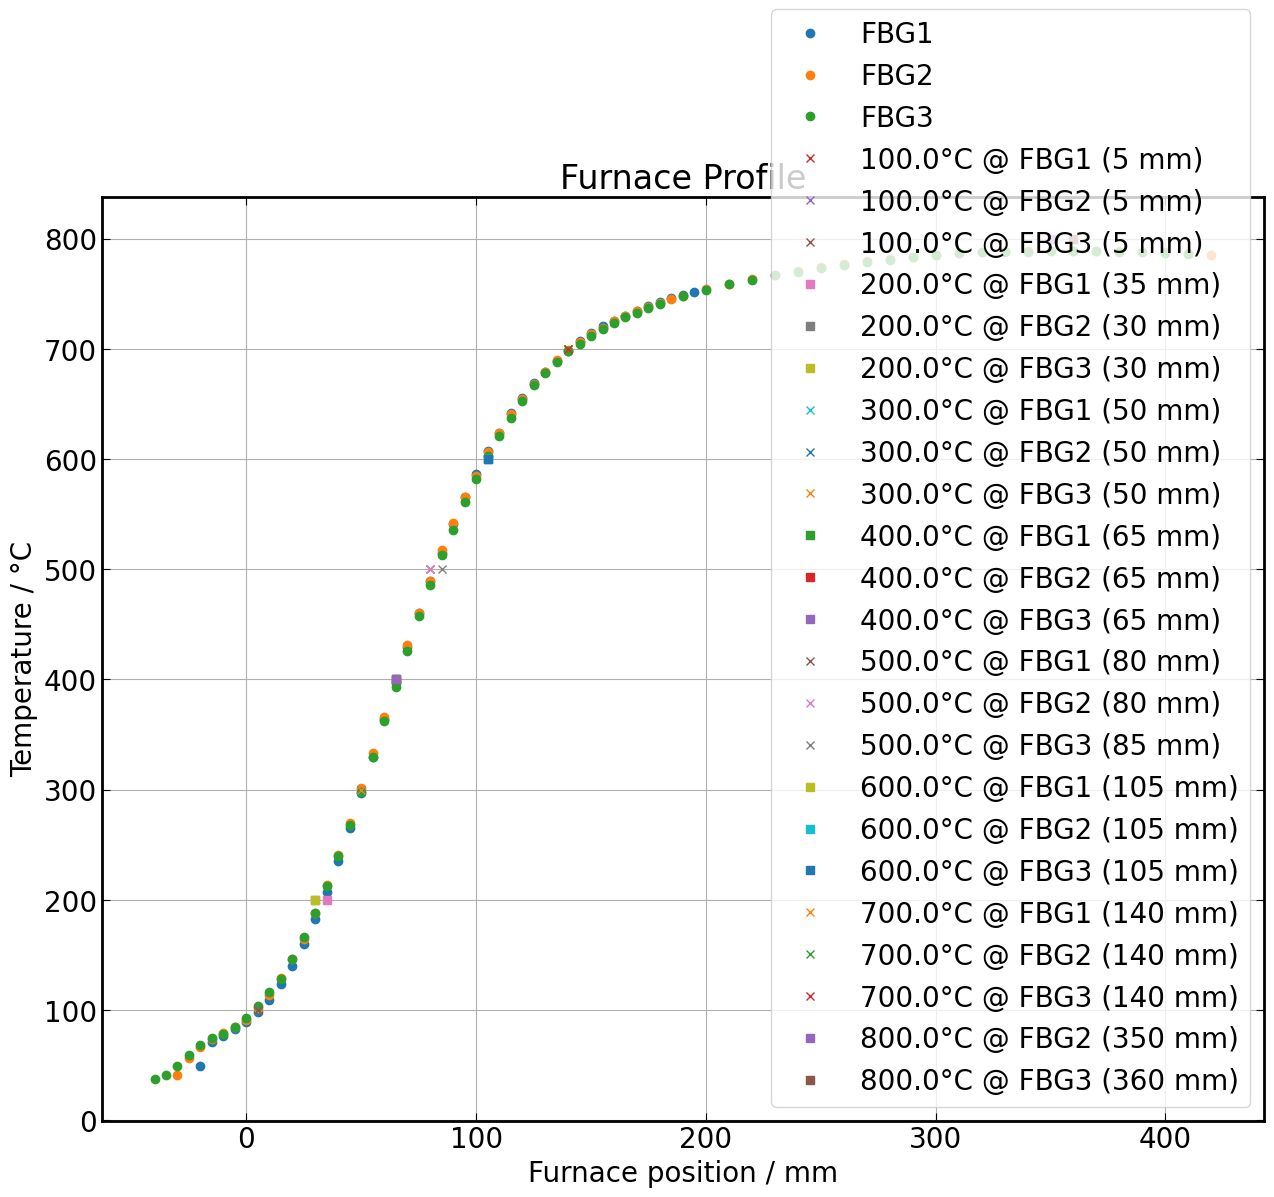

In [123]:
# Plotting all FBG profiles
plt.figure(figsize=(15,12))
plt.plot(pos0, t0, 'o', label = 'FBG1')
plt.plot(pos1, t1, 'o', label = 'FBG2')
plt.plot(pos2, t2, 'o', label = 'FBG3')

temp = np.linspace(100, 800, 8)
# temp = np.linspace(50, 800, 16)
symb = 'x'
for t in temp:

    positions = []
    if t < t0[-1]:
        idx = (np.abs(t0-t)).argmin()
        positions.append(pos0[idx]) 
        plt.plot(pos0[idx], t, symb, label = f'{t}°C @ FBG1 ({pos0[idx]} mm)')

    idx = (np.abs(t1-t)).argmin()
    positions.append(pos1[idx]) 
    plt.plot(pos1[idx], t, symb, label = f'{t}°C @ FBG2 ({pos1[idx]} mm)')

    idx = (np.abs(t2-t)).argmin()
    positions.append(pos2[idx]) 
    plt.plot(pos2[idx], t, symb, label = f'{t}°C @ FBG3 ({pos2[idx]} mm)')

    if symb == 'x':
        symb = 's'
    else:
        symb = 'x'
plt.title('Furnace Profile')
plt.ylabel('Temperature / °C')
plt.xlabel('Furnace position / mm')
plt.legend(loc='lower right')
plt.grid()
plt.show()



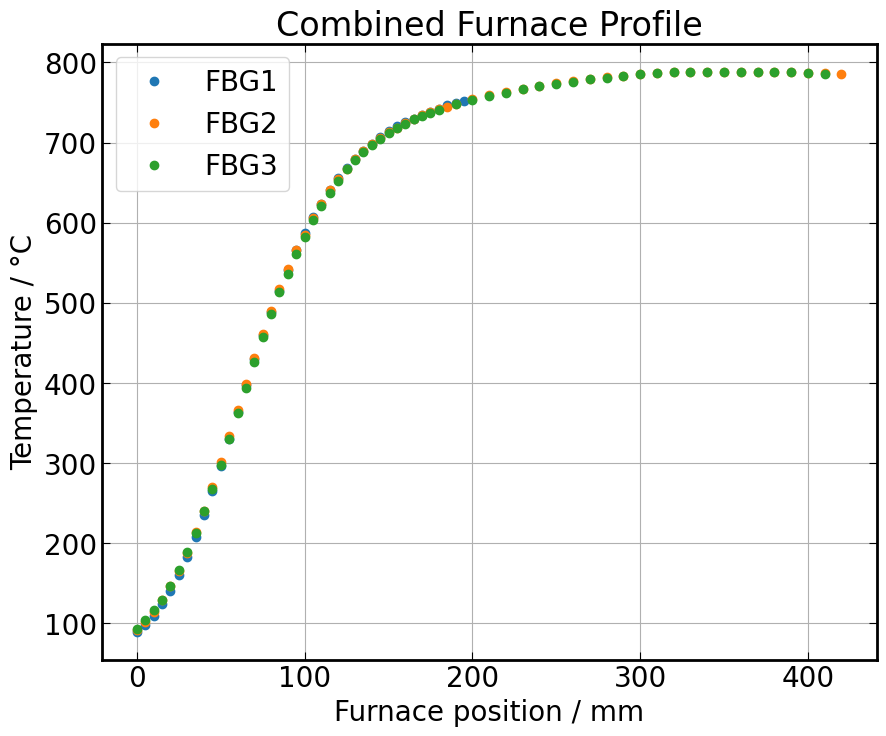

In [124]:
# Combining FBGs
# For each FBG: start with furnace position 0
zero_pos0 = [pos0[i] for i in range(0, len(pos0)) if pos0[i] >= 0]
zero_t0 = t0[len(t0)-len(zero_pos0):]
idx_0_cnt = len([pos0[i] for i in range(0, len(pos0)) if pos0[i] < 0])-1

zero_pos1 = [pos1[i] for i in range(0, len(pos1)) if pos1[i] >= 0]
zero_t1 = t1[len(t1)-len(zero_pos1):]
idx_1_cnt = len([pos1[i] for i in range(0, len(pos1)) if pos1[i] < 0])-1

zero_pos2 = [pos2[i] for i in range(0, len(pos2)) if pos2[i] >= 0]
zero_t2 = t2[len(t2)-len(zero_pos2):]
idx_2_cnt = len([pos2[i] for i in range(0, len(pos2)) if pos2[i] < 0])-1

# Define a mean furnace profile
mean_t = []
pos_values = []
error = []
error_p = []
for i in range(0, len(pos)):
    t_pos = 0
    idx_0 = None
    idx_1 = None
    idx_2 = None
    if pos[i] in zero_pos0:
        idx_0 = zero_pos0.index(pos[i])
    if pos[i] in zero_pos1:
        idx_1 = zero_pos1.index(pos[i])
    if pos[i] in zero_pos2:
        idx_2 = zero_pos2.index(pos[i])

    cnt = 0
    if idx_0 != None:
        t_pos = t_pos + zero_t0[idx_0]
        cnt = cnt + 1
    if idx_1 != None:
        t_pos = t_pos + zero_t1[idx_1]
        cnt = cnt + 1
    if idx_2 != None:
        t_pos = t_pos + zero_t2[idx_2]
        cnt = cnt + 1

    if t_pos != 0:
        mean_t.append(t_pos/cnt)
        pos_values.append(pos[i])

plt.figure(figsize=(10,8))
plt.plot(zero_pos0, zero_t0, 'o', label = 'FBG1')
plt.plot(zero_pos1, zero_t1, 'o', label = 'FBG2')
plt.plot(zero_pos2, zero_t2, 'o', label = 'FBG3')
plt.title('Combined Furnace Profile')
plt.ylabel('Temperature / °C')
plt.xlabel('Furnace position / mm')
plt.grid()
plt.legend()
plt.show()


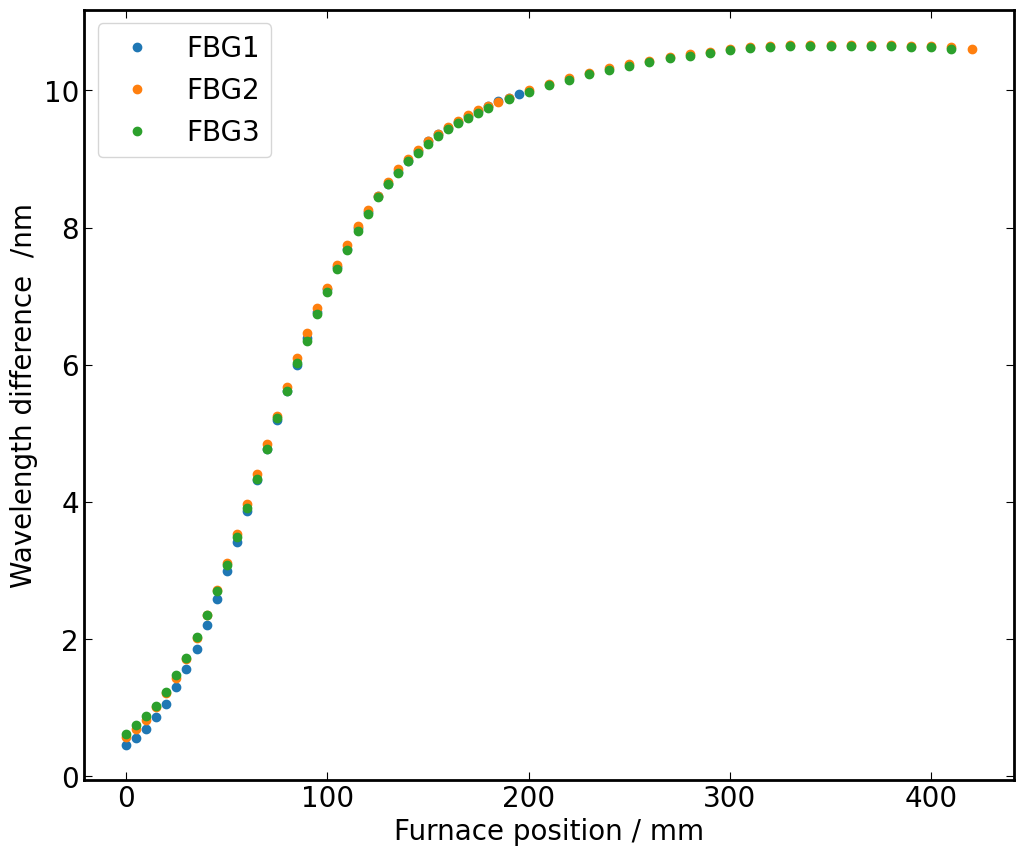

In [125]:

plt.figure(figsize=(12,10))
plt.plot(zero_pos0, peaks0_shift[idx_0_cnt+1::], 'o', label = 'FBG1')
plt.plot(zero_pos1, peaks1_shift[idx_1_cnt+1::], 'o', label = 'FBG2')
plt.plot(zero_pos2, peaks2_shift[idx_2_cnt+1::], 'o', label = 'FBG3')
plt.ylabel('Wavelength difference  /nm')
plt.xlabel('Furnace position / mm')
plt.legend(loc='best')
plt.show()

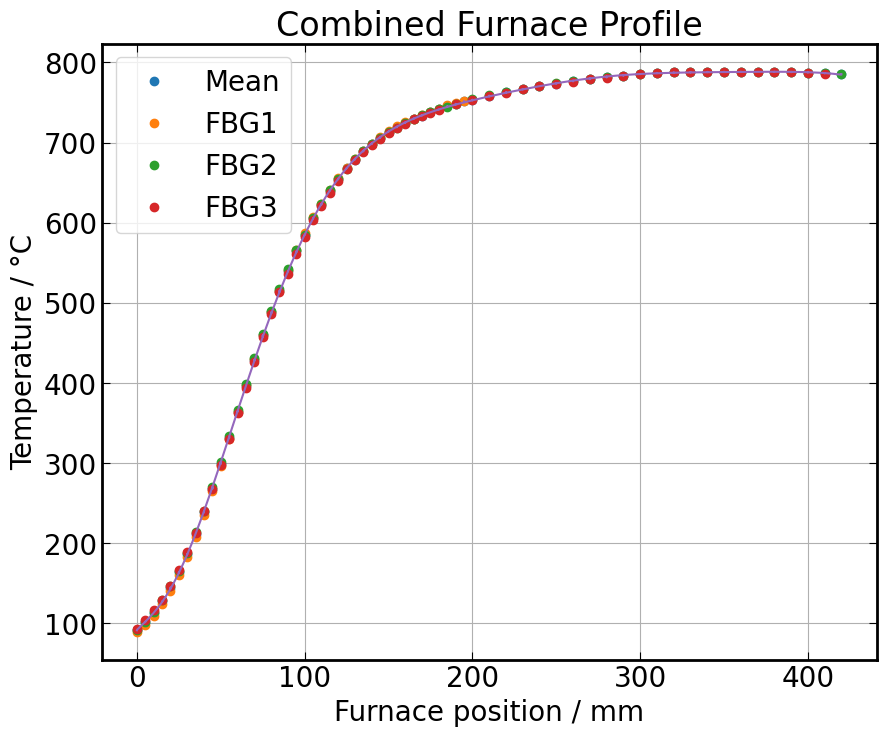

In [126]:
# Interpolating function
pos_values = np.array(pos_values)
mean_t = np.array(mean_t)

# Define interpolation parameters
interp_pos = np.linspace(pos_values[0], pos_values[-1], ((pos_values[-1]-pos_values[0])*100+1))
interp_temperature = []
j = 0
for i in range(0, len(interp_pos)):
    if interp_pos[i] in pos_values:
        interp_temperature.append(mean_t[j])
        j = j+1
    else:
        interp_temperature.append(np.nan)
interp_df = pd.DataFrame({'Position': interp_pos, 'Temperature': interp_temperature})

# Interpolate
interp_t = interp_df['Temperature'].interpolate('spline', order=5)
interp_t = np.asanyarray(interp_t)

plt.figure(figsize=(10,8))
plt.plot(pos_values, mean_t, 'o', label = 'Mean')
plt.plot(zero_pos0, zero_t0, 'o', label = 'FBG1')
plt.plot(zero_pos1, zero_t1, 'o', label = 'FBG2')
plt.plot(zero_pos2, zero_t2, 'o', label = 'FBG3')
plt.plot(interp_pos, interp_t)
plt.title('Combined Furnace Profile')
plt.ylabel('Temperature / °C')
plt.xlabel('Furnace position / mm')
plt.grid()
plt.legend()
plt.show()


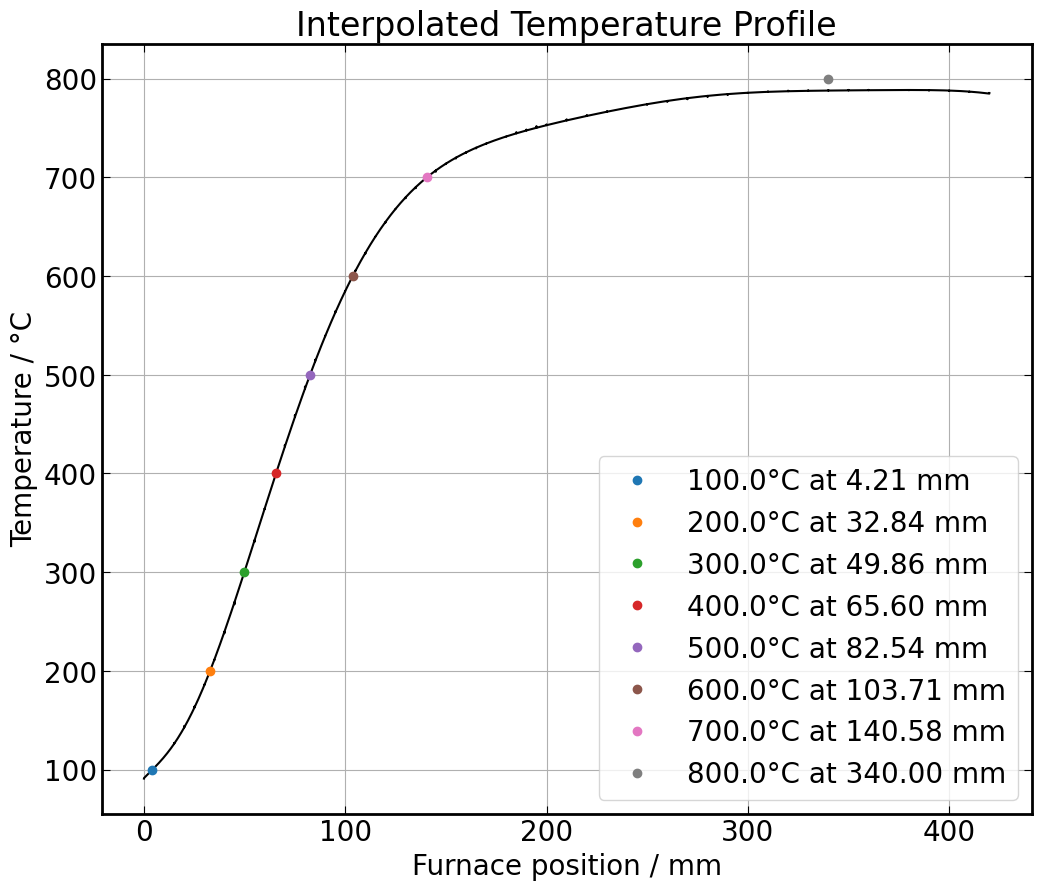

In [127]:
load_default_plot_font(fontsize = 20)
plt.figure(figsize=(12,10))
plt.plot(interp_pos, interp_t, color='black')
temp = np.linspace(100, 800, 8)
for t in temp:
    positions = []
    idx = (np.abs(interp_t[0:35000]-t)).argmin()
    positions.append(interp_pos[idx]) 
    plt.plot(interp_pos[idx], t, 'o', label = f'{t}°C at {interp_pos[idx]:.2f} mm')

    if symb == 'x':
        symb = 's'
    else:
        symb = 'x'

plt.title('Interpolated Temperature Profile')
plt.ylabel('Temperature / °C')
plt.xlabel('Furnace position / mm')
plt.legend(loc='lower right')
plt.grid()
plt.show()


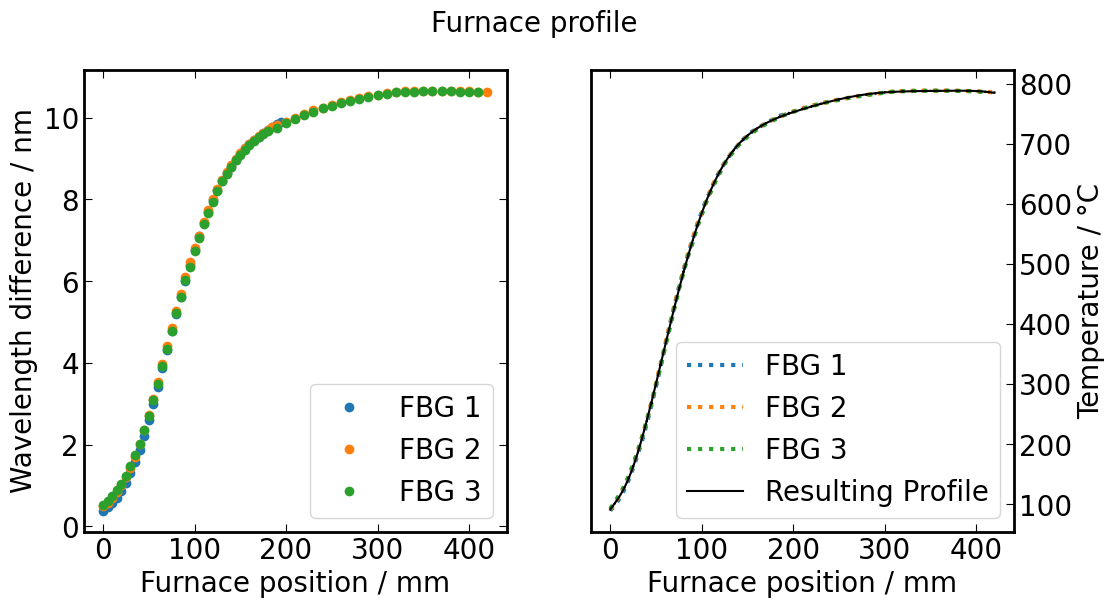

In [128]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axs[0].plot(zero_pos0, peaks0_shift[idx_0_cnt:-1], 'o', label = 'FBG 1')
axs[0].plot(zero_pos1, peaks1_shift[idx_1_cnt:-1], 'o', label = 'FBG 2')
axs[0].plot(zero_pos2, peaks2_shift[idx_2_cnt:-1], 'o', label = 'FBG 3')
axs[0].set_ylabel('Wavelength difference / nm')
axs[1].plot(zero_pos0, zero_t0, ':', label = 'FBG 1', linewidth=3)
axs[1].plot(zero_pos1, zero_t1, ':', label = 'FBG 2', linewidth=3)
axs[1].plot(zero_pos2, zero_t2, ':', label = 'FBG 3', linewidth=3)
axs[1].set_ylabel('Temperature / °C')
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].plot(interp_pos, interp_t, color='black', label='Resulting Profile')

for ax in axs:
    ax.label_outer()
    ax.set_xlabel('Furnace position / mm')
    ax.legend(loc='best')

fig.suptitle('Furnace profile')
plt.show()




In [129]:
print(peaks0[-1])
print(t0[-1])


1563.9420451547885
751.8250599660686


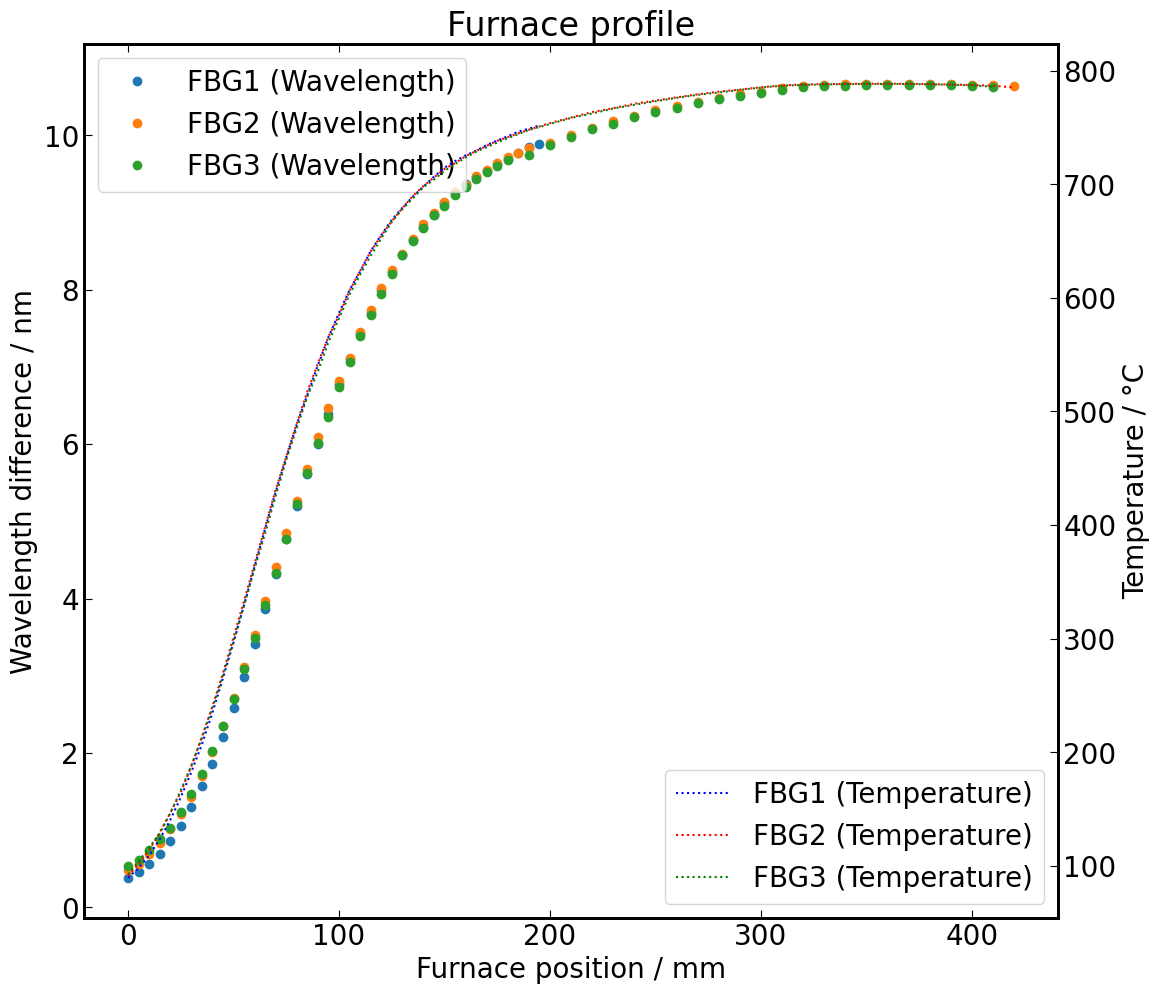

In [130]:

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.plot(zero_pos0, peaks0_shift[idx_0_cnt:-1], 'o', label = 'FBG1 (Wavelength)')
ax1.plot(zero_pos1, peaks1_shift[idx_1_cnt:-1], 'o', label = 'FBG2 (Wavelength)')
ax1.plot(zero_pos2, peaks2_shift[idx_2_cnt:-1], 'o', label = 'FBG3 (Wavelength)')
ax1.set_ylabel('Wavelength difference / nm')
ax1.set_xlabel('Furnace position / mm')
ax2 = ax1.twinx()
ax2.plot(zero_pos0, zero_t0, ':', label = 'FBG1 (Temperature)', color='b')
ax2.plot(zero_pos1, zero_t1, ':', label = 'FBG2 (Temperature)', color='r')
ax2.plot(zero_pos2, zero_t2, ':', label = 'FBG3 (Temperature)', color='g')
ax2.set_ylabel('Temperature / °C')
fig.tight_layout()
plt.title('Furnace profile')
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.show()


In [131]:
t_combined = []
pos_combined = []
wavelength_combined = []

length = len(zero_pos0)
if length < len(zero_pos1):
    length = len(zero_pos1)
if length < len(zero_pos2):
    length = len(zero_pos2)
    
peaks0_shift[idx_0_cnt:-1]

comb_wave_0 = []
comb_wave_1 = []
comb_wave_2 = []

for i in range(0, length):
    if i < len(zero_pos0) and i < len(zero_pos1) and i < len(zero_pos2):
        if zero_pos0[i] == zero_pos1[i] and zero_pos0[i] == zero_pos2[i]:
            combined = [zero_t0[i], zero_t1[i], zero_t2[i]]
            comb_wave_0.append(peaks0_shift[idx_0_cnt+i])
            comb_wave_1.append(peaks1_shift[idx_1_cnt+i])
            comb_wave_2.append(peaks2_shift[idx_2_cnt+i])
            combined_wave = [peaks0_shift[idx_0_cnt+i], peaks1_shift[idx_1_cnt+i], peaks2_shift[idx_2_cnt+i]]
            wavelength_combined.append(np.mean(combined_wave))
            t_combined.append(np.mean(combined))
            pos_combined.append(zero_pos0[i])


In [132]:
def linear_fit(x, a, b):
        return a + b*x

temp_linear = []
plt.figure(figsize=(8,8))
for i in range(0, len(pos_combined)):
    if zero_pos0[i] == zero_pos1[i] and zero_pos0[i] == zero_pos2[i]:
        peaks = [zero_t0[i], zero_t1[i], zero_t2[i]]
        popt, pcov = curve_fit(linear_fit, pos_combined[i], peaks)
        temp_linear.append(linear_fit(pos_combined[i], *popt))
        # plt.plot(pos_combined[i], linear_fit(pos_combined[i], *popt), 'o')
# plt.plot(pos_combined, t_combined, '.')
# plt.show()


<Figure size 800x800 with 0 Axes>

In [133]:
res_comb = []
j = 0
for i, p in enumerate(interp_pos):
    if p in pos_combined:
        res_comb.append(-interp_t[i]+temp_linear[j])
        j = j+1
print(res_comb)


[1.9623769276222447e-10, 2.0736479200422764e-10, 2.2248514142120257e-10, 2.427213985356502e-10, 2.6906832317763474e-10, 3.0118485483399127e-10, 3.390994152141502e-10, 3.823288352577947e-10, 4.303899459046079e-10, 4.839080247620586e-10, 5.411493475548923e-10, 6.009486241964623e-10, 6.62339516566135e-10, 7.189555617514998e-10, 7.802896107023116e-10, 8.340066415257752e-10, 8.86473117134301e-10, 9.380300980410539e-10, 9.775931175681762e-10, 1.0195435606874526e-09, 1.0536496120039374e-09, 1.0873009159695357e-09, 1.1143583833472803e-09, 1.1400516086723655e-09, 1.160628926299978e-09, 1.1797283150372095e-09, 1.191438059322536e-09, 1.2029204299324192e-09, 1.2122427506255917e-09, 1.2196323950774968e-09, 1.2250893632881343e-09, 1.2240661817486398e-09, 1.2273631000425667e-09, 1.2231566870468669e-09, 1.2232703738845885e-09, 1.2232703738845885e-09, 1.2187229003757238e-09]


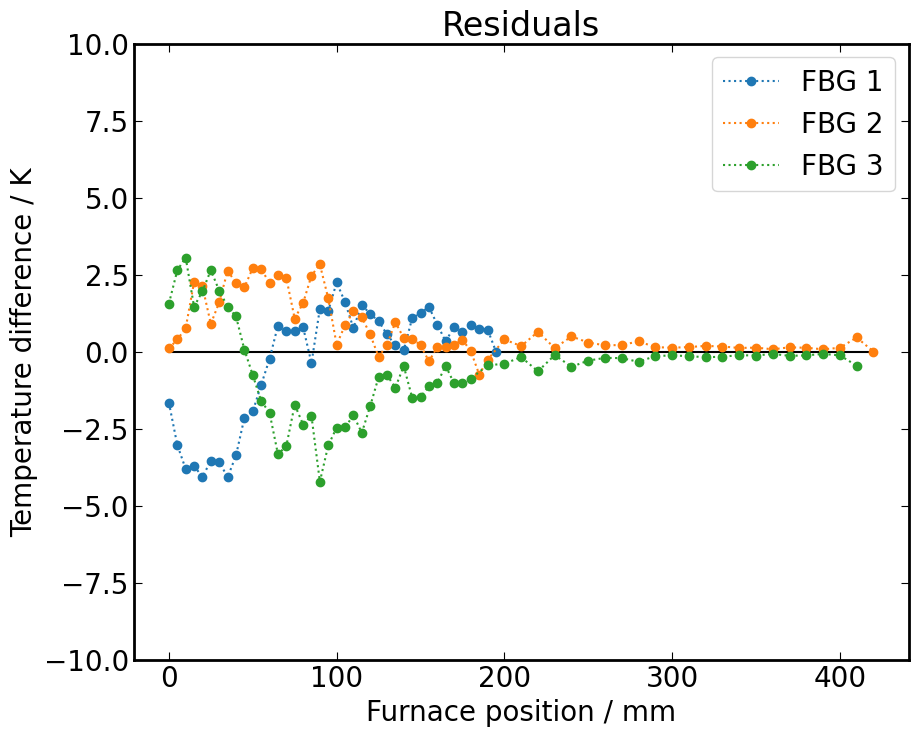

In [134]:
res_pos_0 = []
res_0 = []
res_pos_1 = []
res_1 = []
res_1_23 = []
res_pos_2 = []
res_2 = []
res_2_23 = []
j = 0
k = 0
l = 0
for i, p in enumerate(interp_pos):
    if p in zero_pos0:
        res_pos_0.append(p)
        res_0.append(-interp_t[i]+zero_t0[j])
        j = j+1
    if p in zero_pos1:
        res_pos_1.append(p)
        res_1.append(-interp_t[i]+zero_t1[k])
        k = k+1
    if p in zero_pos2:
        res_pos_2.append(p)
        res_2.append(-interp_t[i]+zero_t2[l])
        l = l+1

plt.figure(figsize=(10,8))
plt.plot([interp_pos[0],interp_pos[-1]], [0,0], color='black')
plt.plot(res_pos_0, res_0, 'o:', label = 'FBG 1')
plt.plot(res_pos_1, res_1, 'o:', label = 'FBG 2')
plt.plot(res_pos_2, res_2, 'o:', label = 'FBG 3')
plt.title('Residuals')
plt.ylabel('Temperature difference / K')
plt.xlabel('Furnace position / mm')
plt.ylim(-10,10)
plt.legend(loc='best')
plt.show()


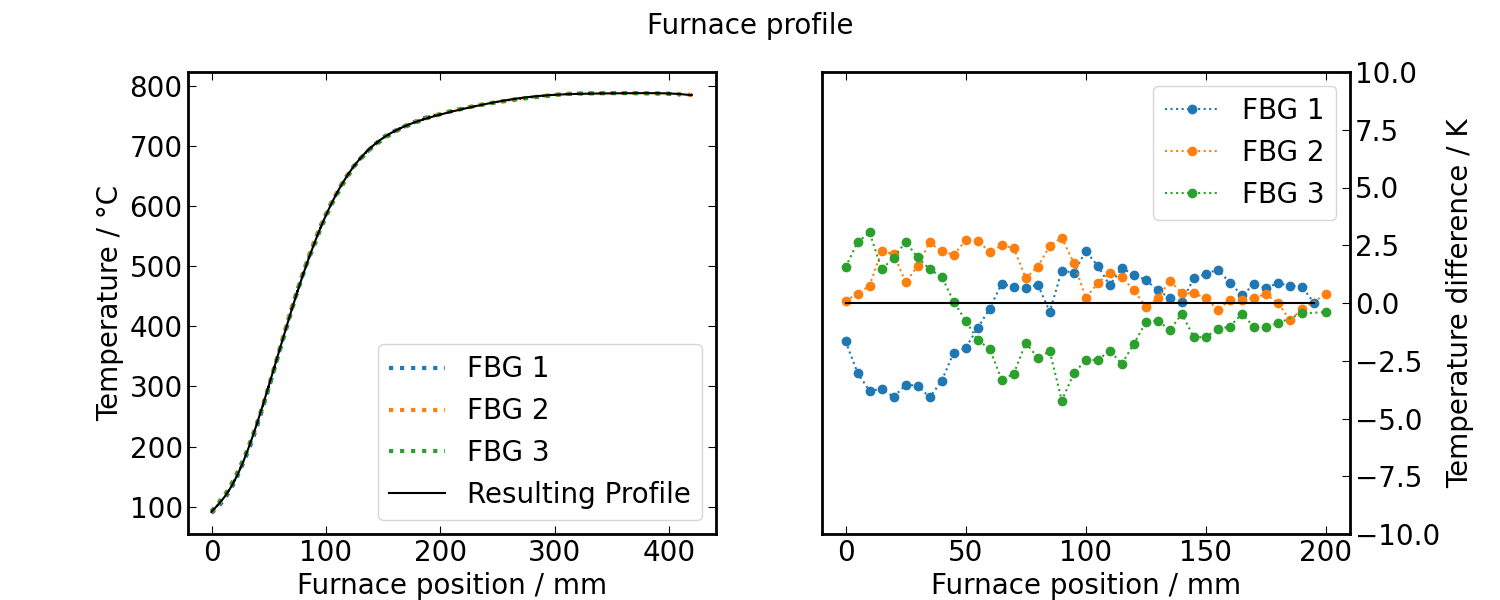

In [141]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))#, gridspec_kw={'width_ratios': [1.5, 2]})
axs[0].plot(zero_pos0, zero_t0, ':', label = 'FBG 1', linewidth=3)
axs[0].plot(zero_pos1, zero_t1, ':', label = 'FBG 2', linewidth=3)
axs[0].plot(zero_pos2, zero_t2, ':', label = 'FBG 3', linewidth=3)
axs[0].plot(interp_pos, interp_t, color='black', label='Resulting Profile')
axs[0].set_ylabel('Temperature / °C')

axs[1].set_ylabel('Temperature difference / K')
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].plot(res_pos_0, res_0, 'o:', label = 'FBG 1')
axs[1].plot(res_pos_1[0:len(res_pos_0)], res_1[0:len(res_pos_0)], 'o:', label = 'FBG 2')
axs[1].plot(res_pos_2[0:len(res_pos_0)-1], res_2[0:len(res_pos_0)-1], 'o:', label = 'FBG 3')

axs[1].set_ylim(-10, 10)
axs[1].plot([res_pos_0[0], res_pos_0[-1]], [0,0], color='black')
for ax in axs:
    ax.label_outer()
    ax.set_xlabel('Furnace position / mm')
axs[0].legend(loc='best')
axs[1].legend(loc='best')
# fig.tight_layout()
fig.suptitle('Furnace profile')
plt.show()


In [136]:
std0 = np.std(res_0)
print(f'STD1: {std0:.2f}')
std1 = np.std(res_1)
print(f'STD2: {std1:.2f}')
std2 = np.std(res_2)
print(f'STD3: {std2:.2f}')

res_all = res_0 + res_1 + res_2
res_all = [*res_0, *res_1, *res_2]

std_all = np.std(res_all)
print(f'Total std: {std_all}')


STD1: 1.89
STD2: 0.93
STD3: 1.46
Total std: 1.5423995664957455
